In [1]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats
from scipy.stats import norm, skew #for some statistics


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [111]:
train=pd.read_csv("train (4).csv")
test=pd.read_csv("test (2).csv")

In [112]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [113]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [114]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 


In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [116]:
train.drop("Id",inplace=True,axis=1)

In [117]:
test.drop("Id",inplace=True,axis=1)

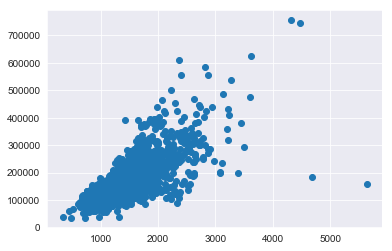

In [118]:
plt.scatter(x=train["GrLivArea"],y=train["SalePrice"])

We can see at the bottom right two with extremely large GrLivArea that are of a low price. These values are huge oultliers. Therefore, we can safely delete them

In [119]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']>700000)].index)

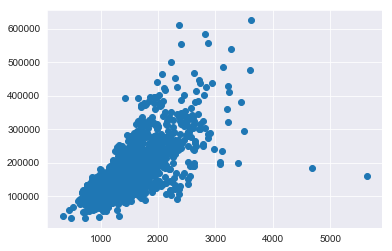

In [120]:
plt.scatter(x=train["GrLivArea"],y=train["SalePrice"])

SalePrice is the variable we need to predict. So let's do some analysis on this variable first.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


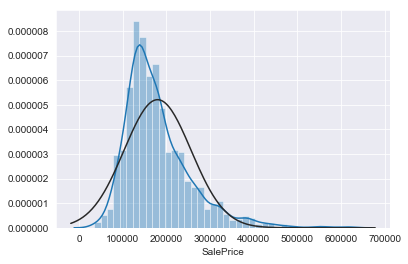

In [121]:
sns.distplot(train["SalePrice"],fit=norm)

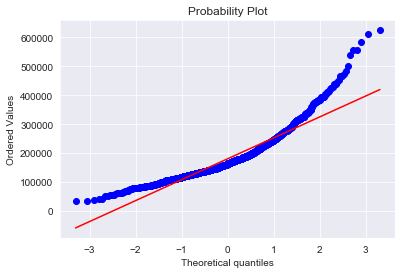

In [122]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

In [123]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"]=np.log1p(train["SalePrice"])

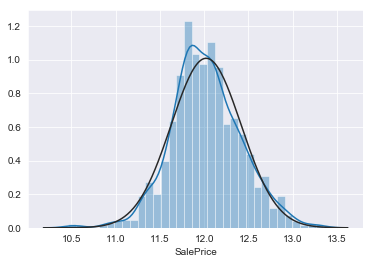

In [124]:
sns.distplot(train["SalePrice"],fit=norm)

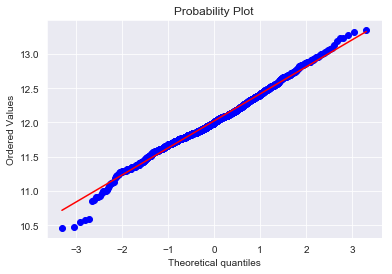

In [125]:
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [126]:
all_data = pd.concat((train, test)).reset_index(drop=True)

In [127]:
all_data.shape

(2917, 80)

In [128]:
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [129]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2835 non-null object
BsmtExposure     2835 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2838 non-null object
BsmtFinType2     2837 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2836 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

In [84]:
all_data_na=(all_data.isnull().sum()/len(all_data)*100)

In [85]:
all_data_na

1stFlrSF         0.000
2ndFlrSF         0.000
3SsnPorch        0.000
Alley           93.208
BedroomAbvGr     0.000
BldgType         0.000
BsmtCond         2.813
BsmtExposure     2.813
BsmtFinSF1       0.034
BsmtFinSF2       0.034
BsmtFinType1     2.710
BsmtFinType2     2.744
BsmtFullBath     0.069
BsmtHalfBath     0.069
BsmtQual         2.779
BsmtUnfSF        0.034
CentralAir       0.000
Condition1       0.000
Condition2       0.000
Electrical       0.034
EnclosedPorch    0.000
ExterCond        0.000
ExterQual        0.000
Exterior1st      0.034
Exterior2nd      0.034
Fence           80.446
FireplaceQu     48.714
Fireplaces       0.000
Foundation       0.000
FullBath         0.000
                 ...  
LotFrontage     16.672
LotShape         0.000
LowQualFinSF     0.000
MSSubClass       0.000
MSZoning         0.137
MasVnrArea       0.789
MasVnrType       0.823
MiscFeature     96.398
MiscVal          0.000
MoSold           0.000
Neighborhood     0.000
OpenPorchSF      0.000
OverallCond

In [88]:
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)

In [89]:
all_data_na

PoolQC         99.726
MiscFeature    96.398
Alley          93.208
Fence          80.446
FireplaceQu    48.714
LotFrontage    16.672
GarageQual      5.455
GarageCond      5.455
GarageFinish    5.455
GarageYrBlt     5.455
GarageType      5.386
BsmtExposure    2.813
BsmtCond        2.813
BsmtQual        2.779
BsmtFinType2    2.744
BsmtFinType1    2.710
MasVnrType      0.823
MasVnrArea      0.789
MSZoning        0.137
BsmtFullBath    0.069
BsmtHalfBath    0.069
Utilities       0.069
Functional      0.069
Electrical      0.034
BsmtUnfSF       0.034
Exterior1st     0.034
Exterior2nd     0.034
TotalBsmtSF     0.034
GarageArea      0.034
GarageCars      0.034
BsmtFinSF2      0.034
BsmtFinSF1      0.034
KitchenQual     0.034
SaleType        0.034
dtype: float64

Text(0.5, 1.0, 'Percent missing data by feature')

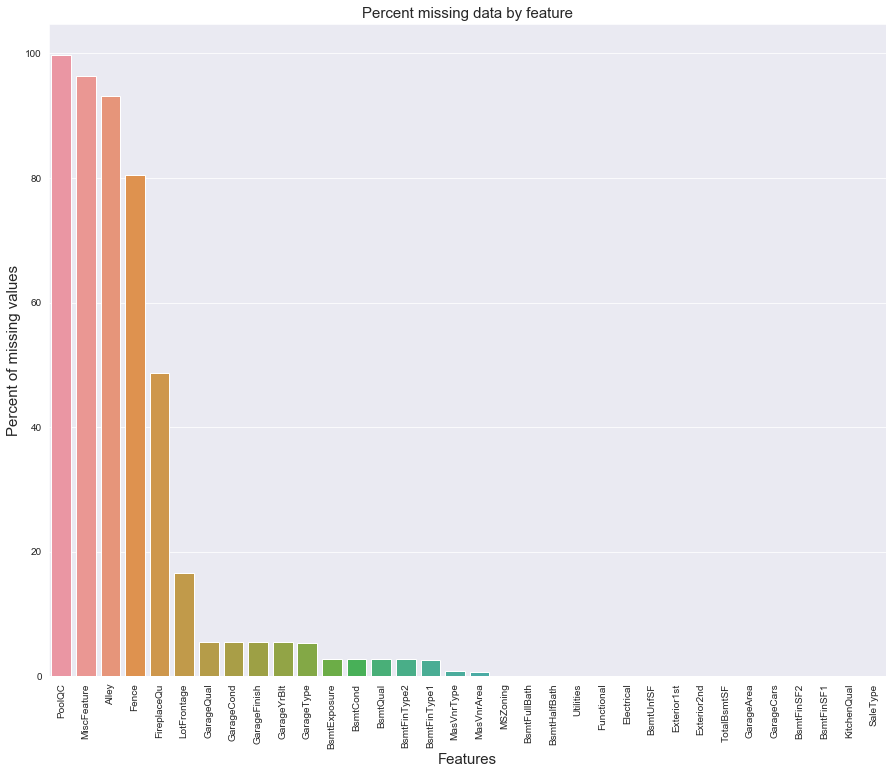

In [130]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


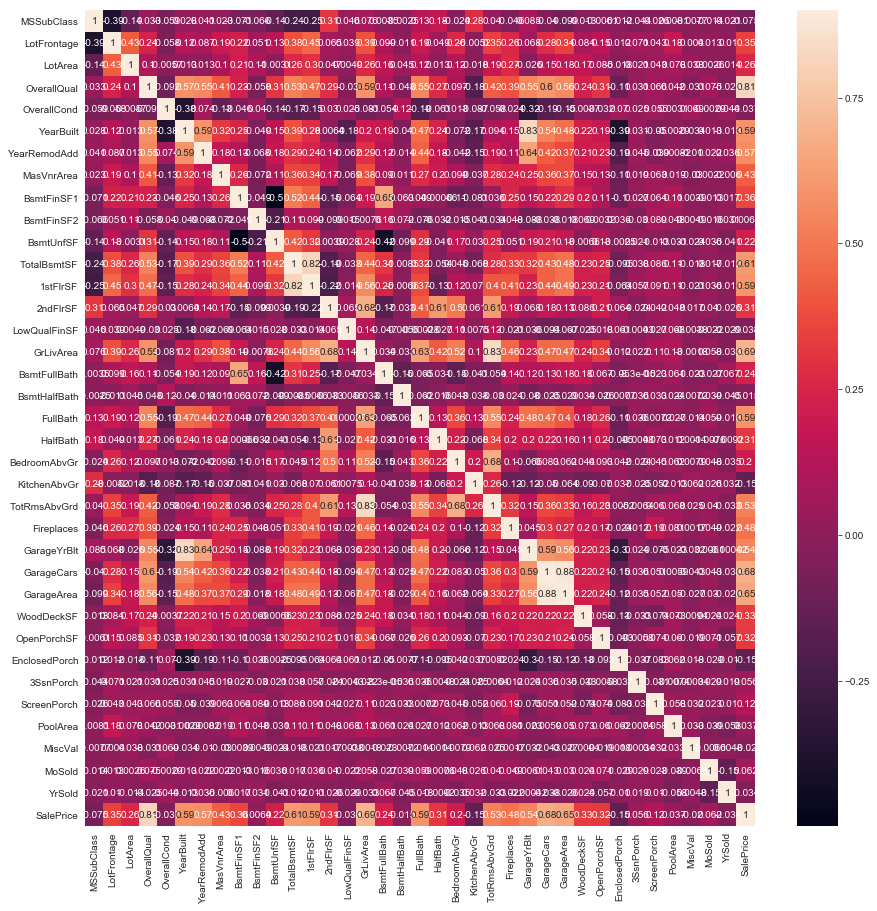

In [131]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corrmat,annot=True,vmax=0.9)

Imputing missing values

PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

In [132]:
all_data["PoolQC"]=all_data["PoolQC"].fillna("None")

In [134]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [135]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [136]:
all_data["Fence"] = all_data["Fence"].fillna("None")


In [137]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")


In [146]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [149]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [150]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [151]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [152]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [153]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [154]:
all_data = all_data.drop(['Utilities'], axis=1)


In [155]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")


In [156]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])


In [157]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])


In [158]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [159]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])


In [160]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [161]:
all_data_na=(all_data.isnull().sum()/len(all_data)*100)

In [162]:
all_data_na

1stFlrSF        0.000
2ndFlrSF        0.000
3SsnPorch       0.000
Alley           0.000
BedroomAbvGr    0.000
BldgType        0.000
BsmtCond        0.000
BsmtExposure    0.000
BsmtFinSF1      0.000
BsmtFinSF2      0.000
BsmtFinType1    0.000
BsmtFinType2    0.000
BsmtFullBath    0.000
BsmtHalfBath    0.000
BsmtQual        0.000
BsmtUnfSF       0.000
CentralAir      0.000
Condition1      0.000
Condition2      0.000
Electrical      0.000
EnclosedPorch   0.000
ExterCond       0.000
ExterQual       0.000
Exterior1st     0.000
Exterior2nd     0.000
Fence           0.000
FireplaceQu     0.000
Fireplaces      0.000
Foundation      0.000
FullBath        0.000
                 ... 
LotConfig       0.000
LotFrontage     0.000
LotShape        0.000
LowQualFinSF    0.000
MSSubClass      0.000
MSZoning        0.000
MasVnrArea      0.000
MasVnrType      0.000
MiscFeature     0.000
MiscVal         0.000
MoSold          0.000
Neighborhood    0.000
OpenPorchSF     0.000
OverallCond     0.000
OverallQua